# Classification

## Team Name
>### Sigma  

## Team Member
>### 조현윤, 이상협, 정하연  

## Objective
> ### in search of better methods of using this behavioral data to predict which individuals they should approach—and even when and how to approach them.
> ### to create a classification algorithm that accurately identifies which customers have the most potential business value for Red Hat based on their characteristics and activities.
> ### to predict the potential business value of a person who has performed a specific activity.

## Evaluation
> ### valuated on area under the ROC curve between the predicted and the observed outcome.

## Submission File
> ### For each activity_id in the test set, you must predict a probability for the 'outcome' variable, represented by a number between 0 and 1.
~~~~
activity_id,outcome
act1_1,0
act1_100006,0
act1_100050,0
~~~~

## Reference 
[kaggel Predicting Red Hat Business Value](https://www.kaggle.com/c/predicting-red-hat-business-value)

## Load Data Set

In [1]:
import pandas as pd
# activity data set
act_Train = pd.read_csv('./data/act_train.csv')
act_Test = pd.read_csv('./data/act_test.csv')
# people data set
people = pd.read_csv('./data/people.csv')

## Data
> #### uses two separate data files that may be joined together to create a single, unified data table.
> #### a people file and an activity file.

In [2]:
pd.set_option('display.max_columns', 60)

### People file
> #### all of the unique people (and the corresponding characteristics) that have performed activities over time.
> #### Each row in the people file represents a unique person.
> #### Each person has a unique people_id.

In [3]:
for column in people.columns:
    print ('featue : {}, type : {}'.format(column,people[column].dtype))

featue : people_id, type : object
featue : char_1, type : object
featue : group_1, type : object
featue : char_2, type : object
featue : date, type : object
featue : char_3, type : object
featue : char_4, type : object
featue : char_5, type : object
featue : char_6, type : object
featue : char_7, type : object
featue : char_8, type : object
featue : char_9, type : object
featue : char_10, type : bool
featue : char_11, type : bool
featue : char_12, type : bool
featue : char_13, type : bool
featue : char_14, type : bool
featue : char_15, type : bool
featue : char_16, type : bool
featue : char_17, type : bool
featue : char_18, type : bool
featue : char_19, type : bool
featue : char_20, type : bool
featue : char_21, type : bool
featue : char_22, type : bool
featue : char_23, type : bool
featue : char_24, type : bool
featue : char_25, type : bool
featue : char_26, type : bool
featue : char_27, type : bool
featue : char_28, type : bool
featue : char_29, type : bool
featue : char_30, type : b

people_id : identical  
group_1 : group *  
date : datetime  
char_1 ~ char_9 : type *  
char_10 ~ char_37 : True or False  
char_38 : integer  

In [4]:
people.head()

,people_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
1,ppl_100002,type 2,group 8688,type 3,2021-01-06,type 28,type 9,type 5,type 3,type 11,type 2,type 4,False,False,True,True,False,False,False,True,False,False,False,False,False,True,False,True,True,True,False,False,True,True,True,True,True,True,True,False,76
2,ppl_100003,type 2,group 33592,type 3,2022-06-10,type 4,type 8,type 5,type 2,type 5,type 2,type 2,True,True,True,True,True,True,False,True,False,True,False,True,True,True,True,True,True,True,True,False,False,True,True,True,True,False,True,True,99
3,ppl_100004,type 2,group 22593,type 3,2022-07-20,type 40,type 25,type 9,type 4,type 16,type 2,type 2,True,True,True,True,True,False,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,76
4,ppl_100006,type 2,group 6534,type 3,2022-07-27,type 40,type 25,type 9,type 3,type 8,type 2,type 2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,84


In [5]:
len(people)

189118

### activity file

> #### the unique activities (and the corresponding activity characteristics) that each person has performed over time.
> #### Each row in the activity file represents a unique activity performed by a person on a certain date.
> #### Each activity has a unique activity_id.
> #### The activity file contains several different categories of activities.    
>> ##### Type 1 activities are different from type 2-7 activities because there are more known characteristics associated with type 1 activities (nine in total) than type 2-7 activities (which have only one associated characteristic).
> ####  All variables are categorical, with the exception of 'char_38' in the people file, which is a continuous numerical variable.

### act_Train

In [6]:
for column in act_Train.columns:
    print ('featue : {}, type : {}'.format(column,act_Train[column].dtype))

featue : people_id, type : object
featue : activity_id, type : object
featue : date, type : object
featue : activity_category, type : object
featue : char_1, type : object
featue : char_2, type : object
featue : char_3, type : object
featue : char_4, type : object
featue : char_5, type : object
featue : char_6, type : object
featue : char_7, type : object
featue : char_8, type : object
featue : char_9, type : object
featue : char_10, type : object
featue : outcome, type : int64


In [7]:
act_Train.head()

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,outcome
0,ppl_100,act2_1734928,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 76,0
1,ppl_100,act2_2434093,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
2,ppl_100,act2_3404049,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
3,ppl_100,act2_3651215,2023-08-04,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
4,ppl_100,act2_4109017,2023-08-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0


### act_Test

In [8]:
for column in act_Test.columns:
    print ('featue : {}, type : {}'.format(column,act_Test[column].dtype))

featue : people_id, type : object
featue : activity_id, type : object
featue : date, type : object
featue : activity_category, type : object
featue : char_1, type : object
featue : char_2, type : object
featue : char_3, type : object
featue : char_4, type : object
featue : char_5, type : object
featue : char_6, type : object
featue : char_7, type : object
featue : char_8, type : object
featue : char_9, type : object
featue : char_10, type : object


In [9]:
act_Test.head()

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10
0,ppl_100004,act1_249281,2022-07-20,type 1,type 5,type 10,type 5,type 1,type 6,type 1,type 1,type 7,type 4,NaN
1,ppl_100004,act2_230855,2022-07-20,type 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 682
2,ppl_10001,act1_240724,2022-10-14,type 1,type 12,type 1,type 5,type 4,type 6,type 1,type 1,type 13,type 10,NaN
3,ppl_10001,act1_83552,2022-11-27,type 1,type 20,type 10,type 5,type 4,type 6,type 1,type 1,type 5,type 5,NaN
4,ppl_10001,act2_1043301,2022-10-15,type 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 3015


> #### To develop a predictive model with this data, you will likely need to join the files together into a single data set.
> #### The two files can be joined together using person_id as the common key.

### Load Python Package

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime
from datetime import date
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.stats.stattools as stools
import scipy as sp
%matplotlib inline

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from scipy.stats import chisquare
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
import xgboost
import io
import pydot
from IPython.core.display import Image 
from sklearn.tree import export_graphviz

/Users/hyunyoun/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
# import numpy as np
def ResetDataFrame(df, checkList):
    for feature in df.columns:
        if feature not in checkList:
            if df[feature].dtype == 'object':
                df[feature].fillna ('type 0', inplace = True)
                df[feature] = df[feature].apply(lambda x:x.split(' ')[1]).astype(np.int32)
            elif df[feature].dtype == 'bool':
                df[feature] = df[feature].astype(np.int8)
    return df

In [14]:
def SetTime(df, timeFeature):
    df[timeFeature] = pd.to_datetime(df[timeFeature])
    df['year'] = df[timeFeature].dt.year
    df['month'] = df[timeFeature].dt.month
    df['day'] = df[timeFeature].dt.day
    df['weekday'] = df[timeFeature].dt.weekday
    df['weekend'] = ((df.weekday == 0) | (df.weekday == 6)).astype(int)
    return df

## Exploratory Data Analysis (EDA )¶

#### people id in act_train data set

In [15]:
len(act_Train)

2197291

In [16]:
print('Number of active people: {}'.format(act_Train['people_id'].nunique()))

Number of active people: 151295


/Users/hyunyoun/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


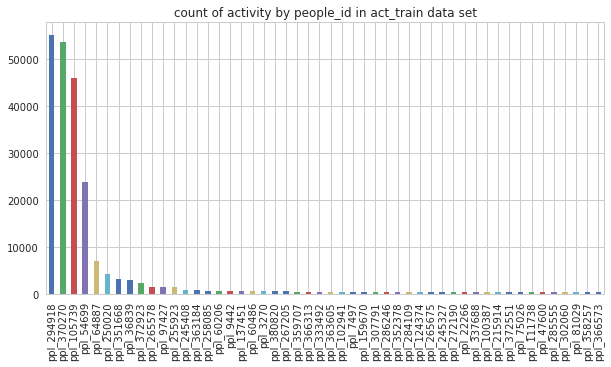

In [17]:
plt.figure(figsize=(10,5))
act_Train['people_id'].value_counts()[:50].plot(kind = 'bar',title = 'count of activity by people_id in act_train data set')

#### people id in act_test data set

In [18]:
len(act_Test)

498687

In [19]:
print('Number of active people: {}'.format(act_Test['people_id'].nunique()))

Number of active people: 37823


/Users/hyunyoun/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


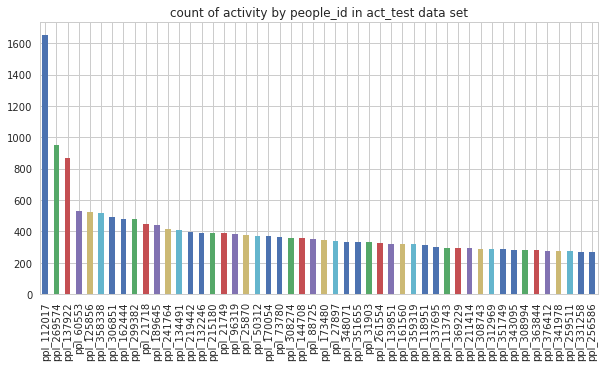

In [20]:
plt.figure(figsize=(10,5))
act_Test['people_id'].value_counts()[:50].plot(kind = 'bar',title = 'count of activity by people_id in act_test data set')

### Split people data set wether train data set or test data set

In [21]:
idx_train =list(act_Train['people_id'].value_counts().index)
idx_test =list(act_Test['people_id'].value_counts().index)

In [22]:
train_people = people.loc[people['people_id'].isin(idx_train)]
test_people = people.loc[people['people_id'].isin(idx_test)]

In [23]:
train_people.to_csv('./data/act_train_people.csv',index=False)
test_people.to_csv('./data/act_test_people.csv',index=False)

### group by people_id & outcome in people data set

In [24]:
dfx = act_Train.groupby(['people_id','outcome']).size().unstack()
dfx = dfx.fillna(0).astype(int)

In [25]:
only_1 = dfx[(dfx[0]==0) & (dfx[1]!=0)]
only_0 = dfx[(dfx[0]!=0) & (dfx[1]==0)]
mix__0or1 = dfx[(dfx[0]!=0) & (dfx[1]!=0)]
totalCount = len(only_1.index) + len(only_0.index) + len(mix__0or1)

In [26]:
only1 = len(only_1.index)/totalCount
only0 = len(only_0.index)/totalCount
mix = len(mix__0or1)/totalCount

In [27]:
print ('only 1 : {0}, people probability : {1:0.4f}'.format(len(only_1.index), only1))
print ('only 0 : {0} , people probability : {1:0.4f}'.format(len(only_0.index), only0))
print ('0 or 1 : {0}, , people probability : {1:0.4f}'.format(len(mix__0or1), mix))

only 1 : 62115, people probability : 0.4106
only 0 : 82524 , people probability : 0.5455
0 or 1 : 6656, , people probability : 0.0440


### people_id & outcome in act_train data set

In [1]:
train_people = pd.merge(train_people, dfx, left_on = 'people_id',right_index = True)

NameError: name 'train_people' is not defined

In [29]:
train_people.rename(columns={0:'outcome_0',1:'outcome_1'}, inplace = True)

In [30]:
def ax(x):
    if x['outcome_0'] !=0 and x['outcome_1'] ==0:
        return 0
    elif x['outcome_0'] ==0 and x['outcome_1'] !=0:
        return 1
    else:
        return 2

In [31]:
train_people['result'] = train_people.apply(ax, axis = 1)

In [32]:
x = train_people[['people_id','outcome_0','outcome_1']]
x.set_index('people_id', inplace = True)
x = x.loc[idx_train]

/Users/hyunyoun/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


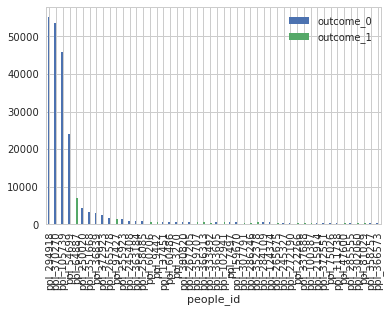

In [33]:
plt.figure(figsize=(15,5))
x[:50].plot(kind = 'bar')

In [34]:
train_people.drop(['outcome_0','outcome_1'],inplace = True, axis = 1)

/Users/hyunyoun/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


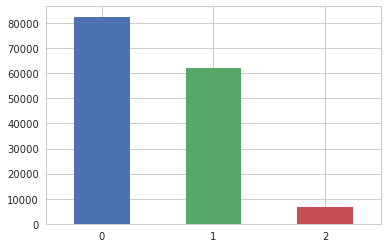

In [35]:
train_people['result'].value_counts().plot(kind = 'bar',rot = 0)

In [36]:
only1_in_act = len(act_Train.loc[act_Train['people_id'].isin(only_1.index)])
only0_in_act = len(act_Train.loc[act_Train['people_id'].isin(only_0.index)])
mix_in_act = len(act_Train.loc[act_Train['people_id'].isin(mix__0or1.index)])
print ('{} {} {}'.format(only1_in_act, only0_in_act, mix_in_act))

819757 1069456 308078


### Preprocessing

#### People data

In [37]:
list1 = ['people_id','date','char_38']
people = ResetDataFrame(people, list1)
people = SetTime(people,'date')

In [38]:
people.head()

,people_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38,year,month,day,weekday,weekend
0,ppl_100,2,17304,2,2021-06-29,5,5,5,3,11,2,2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,2021,6,29,1,0
1,ppl_100002,2,8688,3,2021-01-06,28,9,5,3,11,2,4,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,1,1,0,0,1,1,1,1,1,1,1,0,76,2021,1,6,2,0
2,ppl_100003,2,33592,3,2022-06-10,4,8,5,2,5,2,2,1,1,1,1,1,1,0,1,0,1,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,0,1,1,99,2022,6,10,4,0
3,ppl_100004,2,22593,3,2022-07-20,40,25,9,4,16,2,2,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,76,2022,7,20,2,0
4,ppl_100006,2,6534,3,2022-07-27,40,25,9,3,8,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,84,2022,7,27,2,0


#### Train data

In [39]:
list1 = ['people_id','activity_id','date', 'outcome']
act_Train = ResetDataFrame(act_Train, list1)
act_Train = SetTime(act_Train,'date')

In [40]:
trainMerge = pd.merge(act_Train,people, on='people_id')
trainMerge.tail()

,people_id,activity_id,date_x,activity_category,char_1_x,char_2_x,char_3_x,char_4_x,char_5_x,char_6_x,char_7_x,char_8_x,char_9_x,char_10_x,outcome,year_x,month_x,day_x,weekday_x,weekend_x,char_1_y,group_1,char_2_y,date_y,char_3_y,char_4_y,char_5_y,char_6_y,char_7_y,char_8_y,...,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38,year_y,month_y,day_y,weekday_y,weekend_y
2197286,ppl_99994,act2_4668076,2023-06-16,4,0,0,0,0,0,0,0,0,0,418,1,2023,6,16,4,0,2,17764,3,2023-01-06,2,7,2,1,2,2,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,95,2023,1,6,4,0
2197287,ppl_99994,act2_4743548,2023-03-30,4,0,0,0,0,0,0,0,0,0,1832,1,2023,3,30,3,0,2,17764,3,2023-01-06,2,7,2,1,2,2,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,95,2023,1,6,4,0
2197288,ppl_99994,act2_536973,2023-01-19,2,0,0,0,0,0,0,0,0,0,1,1,2023,1,19,3,0,2,17764,3,2023-01-06,2,7,2,1,2,2,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,95,2023,1,6,4,0
2197289,ppl_99994,act2_688656,2023-05-02,4,0,0,0,0,0,0,0,0,0,199,1,2023,5,2,1,0,2,17764,3,2023-01-06,2,7,2,1,2,2,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,95,2023,1,6,4,0
2197290,ppl_99994,act2_715089,2023-06-15,2,0,0,0,0,0,0,0,0,0,1,1,2023,6,15,3,0,2,17764,3,2023-01-06,2,7,2,1,2,2,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,95,2023,1,6,4,0


In [41]:
trainMerge.to_csv('./data/train_merge.csv',index=False)

#### Test data

In [42]:
list1 = ['people_id','activity_id','date', 'outcome']
act_Test = ResetDataFrame(act_Test, list1)
act_Test = SetTime(act_Test,'date')

In [43]:
testMerge = pd.merge(act_Test,people, on='people_id')
testMerge.tail()

,people_id,activity_id,date_x,activity_category,char_1_x,char_2_x,char_3_x,char_4_x,char_5_x,char_6_x,char_7_x,char_8_x,char_9_x,char_10_x,year_x,month_x,day_x,weekday_x,weekend_x,char_1_y,group_1,char_2_y,date_y,char_3_y,char_4_y,char_5_y,char_6_y,char_7_y,char_8_y,char_9_y,...,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38,year_y,month_y,day_y,weekday_y,weekend_y
498682,ppl_99997,act2_4367092,2023-04-22,2,0,0,0,0,0,0,0,0,0,1,2023,4,22,5,0,2,17304,2,2022-03-12,40,25,9,3,8,6,6,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,2022,3,12,5,0
498683,ppl_99997,act2_4404220,2022-11-12,2,0,0,0,0,0,0,0,0,0,1,2022,11,12,5,0,2,17304,2,2022-03-12,40,25,9,3,8,6,6,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,2022,3,12,5,0
498684,ppl_99997,act2_448830,2022-08-02,2,0,0,0,0,0,0,0,0,0,1,2022,8,2,1,0,2,17304,2,2022-03-12,40,25,9,3,8,6,6,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,2022,3,12,5,0
498685,ppl_99997,act2_450133,2022-08-02,2,0,0,0,0,0,0,0,0,0,1,2022,8,2,1,0,2,17304,2,2022-03-12,40,25,9,3,8,6,6,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,2022,3,12,5,0
498686,ppl_99997,act2_847967,2022-10-15,2,0,0,0,0,0,0,0,0,0,1,2022,10,15,5,0,2,17304,2,2022-03-12,40,25,9,3,8,6,6,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,2022,3,12,5,0


In [44]:
testMerge.to_csv('./data/test_merge.csv',index=False)

#### Label encode

In [45]:
date_x_Encoder = LabelEncoder()
date_y_Encoder = LabelEncoder()

In [46]:
date_x_Encoder.fit(pd.concat([trainMerge['date_x'],testMerge['date_x']]))

LabelEncoder()

In [47]:
date_y_Encoder.fit(pd.concat([trainMerge['date_y'],testMerge['date_y']]))

LabelEncoder()

In [48]:
trainMerge['date_x'] = date_x_Encoder.fit_transform(trainMerge['date_x'])

In [49]:
trainMerge['date_y'] = date_y_Encoder.fit_transform(trainMerge['date_y'])

In [50]:
testMerge['date_x'] = date_x_Encoder.fit_transform(testMerge['date_x'])

In [51]:
testMerge['date_y'] = date_y_Encoder.fit_transform(testMerge['date_y'])

### Classification 1st
> do not drop date in people data & date in activity data

In [52]:
trainMerge.head()

,people_id,activity_id,date_x,activity_category,char_1_x,char_2_x,char_3_x,char_4_x,char_5_x,char_6_x,char_7_x,char_8_x,char_9_x,char_10_x,outcome,year_x,month_x,day_x,weekday_x,weekend_x,char_1_y,group_1,char_2_y,date_y,char_3_y,char_4_y,char_5_y,char_6_y,char_7_y,char_8_y,...,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38,year_y,month_y,day_y,weekday_y,weekend_y
0,ppl_100,act2_1734928,405,4,0,0,0,0,0,0,0,0,0,76,0,2023,8,26,5,0,2,17304,2,405,5,5,5,3,11,2,...,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,2021,6,29,1,0
1,ppl_100,act2_2434093,72,2,0,0,0,0,0,0,0,0,0,1,0,2022,9,27,1,0,2,17304,2,405,5,5,5,3,11,2,...,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,2021,6,29,1,0
2,ppl_100,act2_3404049,72,2,0,0,0,0,0,0,0,0,0,1,0,2022,9,27,1,0,2,17304,2,405,5,5,5,3,11,2,...,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,2021,6,29,1,0
3,ppl_100,act2_3651215,383,2,0,0,0,0,0,0,0,0,0,1,0,2023,8,4,4,0,2,17304,2,405,5,5,5,3,11,2,...,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,2021,6,29,1,0
4,ppl_100,act2_4109017,405,2,0,0,0,0,0,0,0,0,0,1,0,2023,8,26,5,0,2,17304,2,405,5,5,5,3,11,2,...,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,36,2021,6,29,1,0


In [53]:
mergeX = trainMerge.drop(['people_id','activity_id','outcome'],axis = 1)
mergey = trainMerge['outcome']

In [54]:
act_id = testMerge['activity_id']
testMergeX = testMerge.drop(['people_id','activity_id'],axis = 1)

In [55]:
x_train, x_test, y_train,y_test = train_test_split(mergeX, mergey, test_size=0.2)

#### Gradient boost

In [59]:
original_params = {'n_estimators': 10, 'max_depth': 10, 'random_state': 2,
                   'min_samples_split':20000}
original_params.update({'learning_rate': 0.5, 'subsample': 0.7})

In [60]:
mmodel_grad = GradientBoostingClassifier(**original_params).fit(x_train, y_train)

In [61]:
cross_val_score(mmodel_grad, x_test, y_test, scoring="accuracy", cv=10)

array([ 0.86649524,  0.86685933,  0.87111455,  0.86756474,  0.86902107,
        0.86813362,  0.86867974,  0.86644973,  0.86490238,  0.86842644])

In [62]:
grad_fi = sorted(zip(x_test.columns,mmodel_grad.feature_importances_),key=lambda x: x[1])[-10:]

#### Random forest

In [63]:
original_params1 = {'n_estimators': 10, 'max_depth': 10, 'random_state': 2,
                   'min_samples_split': 20000}

In [64]:
mrfmodel = RandomForestClassifier(**original_params1).fit(x_train, y_train)

In [65]:
cross_val_score(mrfmodel, x_test, y_test, scoring="accuracy", cv=10)

array([ 0.83475174,  0.83659491,  0.83648114,  0.83331816,  0.83800573,
        0.83302235,  0.83623083,  0.83784645,  0.83602603,  0.83486176])

In [66]:
rf_fi = sorted(zip(x_test.columns,mrfmodel.feature_importances_),key=lambda x: x[1])[-10:]

### Feature Importance

In [67]:
for idx in range(10):
    print ('gradient boost : {0}, {1:0.4f}, randomforest : {2}, {3:0.4f}'.format(grad_fi[idx][0],float(grad_fi[idx][1]), rf_fi[idx][0],float(rf_fi[idx][1])))

gradient boost : day_y, 0.0100, randomforest : char_7_y, 0.0185
gradient boost : weekday_y, 0.0143, randomforest : char_34, 0.0209
gradient boost : char_8_y, 0.0152, randomforest : char_36, 0.0212
gradient boost : char_9_y, 0.0156, randomforest : char_1_y, 0.0242
gradient boost : char_2_y, 0.0205, randomforest : char_8_y, 0.0266
gradient boost : date_y, 0.0343, randomforest : char_17, 0.0316
gradient boost : char_6_y, 0.0563, randomforest : char_13, 0.0436
gradient boost : char_7_y, 0.0865, randomforest : char_2_y, 0.1587
gradient boost : group_1, 0.2463, randomforest : group_1, 0.2024
gradient boost : char_38, 0.4039, randomforest : char_38, 0.3505


#### XGBOOST

#### XGBoost object model

> Train a booster with given parameters.

* max_depth : Maximum tree depth for base learners
* subsample : Subsample ratio of the training instance.
* colsample_bytree : Subsample ratio of columns when constructing each tree.
* objective : Specify the learning task and the corresponding learning objective or a custom objective function to be used
* booster : Specify which booster to use: gbtree, gblinear or dart.
* eval_metric : evaluation
* silent : Whether to print messages while running boosting.
* num_boost_round : Number of boosting iterations
* early_stopping_rounds : Activates early stopping. Validation error needs to decrease at least every <early_stopping_rounds> round(s) to continue training
* eta : Boosting learning rate
* min_child_weight : In linear regression mode, this simply corresponds to minimum number of instances needed to be in each node. The larger, the more conservative the algorithm will be

In [162]:
max_depth = 3
subsample = 0.8
colsample_bytree= 0.8
random_state = 0
params ={
        "objective": "binary:logistic",
        "booster" : "gbtree",
        "eval_metric": "auc",
        "max_depth" : max_depth,
        "subsample": subsample,
        "colsample_bytree": colsample_bytree,
        "silent":1,
        'nthread':5,
        'eta':1.15,
    "seed": random_state
    }
num_boost_round = 130
early_stopping_rounds = 10
test_size = 0.1

In [163]:
X_train, X_valid = train_test_split(trainMerge, test_size=test_size)
y_train = X_train['outcome']
y_valid = X_valid['outcome']
X_train = X_train.drop(['people_id','activity_id','outcome'],axis = 1)
X_valid = X_valid.drop(['people_id','activity_id','outcome'], axis = 1)
dtrain = xgboost.DMatrix(X_train, y_train)
dvalid = xgboost.DMatrix(X_valid, y_valid)
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
gbm = xgboost.train(params, dtrain, num_boost_round, evals=watchlist, early_stopping_rounds=early_stopping_rounds, verbose_eval=True)
check = gbm.predict(xgboost.DMatrix(X_valid),ntree_limit=gbm.best_iteration+1)
score = roc_auc_score(y_valid, check)
print (score)
testActivityId = testMerge['activity_id']
test = testMerge.drop(['people_id','activity_id'],axis = 1)

[0]	train-auc:0.889887	eval-auc:0.889181
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[1]	train-auc:0.910354	eval-auc:0.909776
[2]	train-auc:0.913716	eval-auc:0.913091
[3]	train-auc:0.919923	eval-auc:0.919294
[4]	train-auc:0.920959	eval-auc:0.920376
[5]	train-auc:0.925019	eval-auc:0.924387
[6]	train-auc:0.926118	eval-auc:0.925436
[7]	train-auc:0.929173	eval-auc:0.928721
[8]	train-auc:0.929499	eval-auc:0.928905
[9]	train-auc:0.930221	eval-auc:0.92969
[10]	train-auc:0.931117	eval-auc:0.930553
[11]	train-auc:0.931335	eval-auc:0.930831
[12]	train-auc:0.932314	eval-auc:0.931765
[13]	train-auc:0.932894	eval-auc:0.932267
[14]	train-auc:0.933367	eval-auc:0.932736
[15]	train-auc:0.934634	eval-auc:0.934107
[16]	train-auc:0.935243	eval-auc:0.934597
[17]	train-auc:0.935672	eval-auc:0.934947
[18]	train-auc:0.936037	eval-auc:0.93531
[19]	train-auc:0.936131	eval-auc:0.935339
[20]	train-auc:0.936544	eval-au

In [239]:
gbm.best_iteration

100

In [164]:
test_prediction = gbm.predict(xgboost.DMatrix(test),ntree_limit=gbm.best_iteration+1)
out = pd.concat([testActivityId,pd.DataFrame(test_prediction.round())],axis = 1)
out.rename({0:'outcome'},axis = 1,inplace = True)
#out.to_csv('./ours2.csv',index = False)
out.to_csv('./ours4.csv',index = False)

> auc : 0.846252

/Users/hyunyoun/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


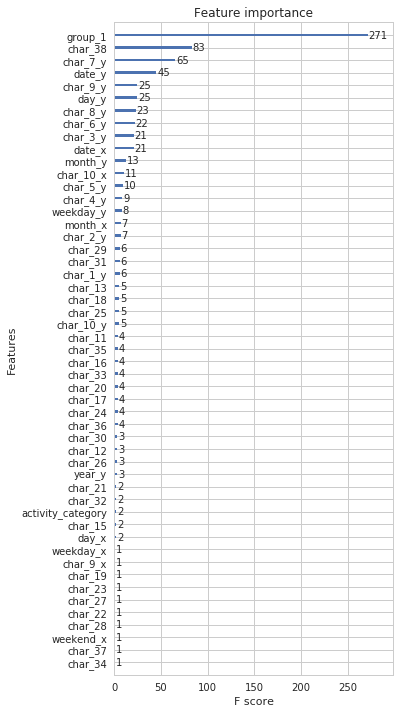

In [165]:
fig, ax = plt.subplots(1,1,figsize=(5,12))
xgboost.plot_importance(gbm,ax=ax)

In [166]:
gbm.save_model('ourmodel1.model')

In [167]:
from operator import itemgetter

In [168]:
sorted(gbm.get_fscore().items(), key=itemgetter(1), reverse=True)[:10]

[('group_1', 271),
 ('char_38', 83),
 ('char_7_y', 65),
 ('date_y', 45),
 ('day_y', 25),
 ('char_9_y', 25),
 ('char_8_y', 23),
 ('char_6_y', 22),
 ('date_x', 21),
 ('char_3_y', 21)]

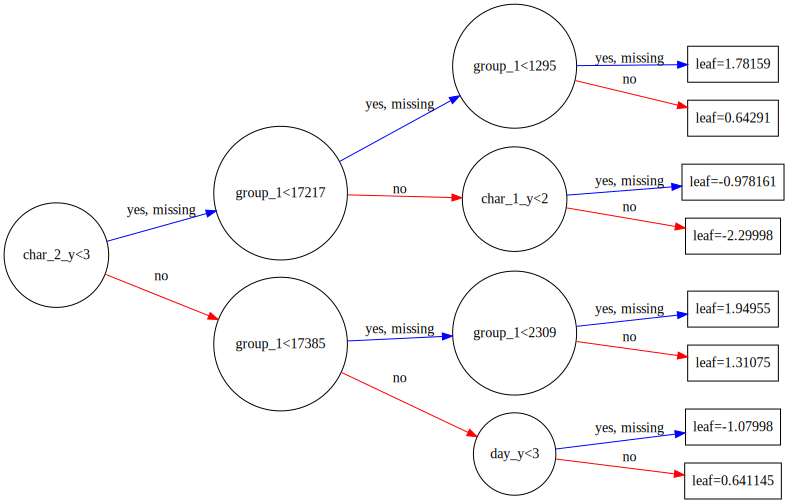

In [169]:
xgboost.to_graphviz(gbm,rankdir='LR')

### Classification 2nd
> drop date in people data & date in activity data

In [71]:
trainMerge2 = trainMerge.drop(['date_x','date_y'],axis = 1)
testMerge2 = testMerge.drop(['date_x','date_y'],axis = 1)

In [72]:
mergeX2 = trainMerge2.drop(['people_id','activity_id','outcome'],axis = 1)
mergey2 = trainMerge2['outcome']

In [73]:
act_id = testMerge2['activity_id']
testMerge2X = testMerge2.drop(['people_id','activity_id'],axis = 1)

In [74]:
x_train2, x_test2, y_train2,y_test2 = train_test_split(mergeX2, mergey2, test_size=0.2)

#### Gradient boost

In [75]:
original_params = {'n_estimators': 10, 'max_depth': 10, 'random_state': 2,
                   'min_samples_split':20000}
original_params.update({'learning_rate': 0.5, 'subsample': 0.7})

In [76]:
mmodel_grad2 = GradientBoostingClassifier(**original_params).fit(x_train2, y_train2)

In [77]:
cross_val_score(mmodel_grad2, x_test2, y_test2, scoring="accuracy", cv=10)

array([ 0.86979771,  0.86615696,  0.86308508,  0.86799709,  0.86531197,
        0.87034087,  0.86894982,  0.86915463,  0.871635  ,  0.86863124])

In [78]:
grad_fi2 = sorted(zip(x_test2.columns,mmodel_grad2.feature_importances_),key=lambda x: x[1])[-10:]

#### Random forest

In [79]:
original_params1 = {'n_estimators': 10, 'max_depth': 10, 'random_state': 2,
                   'min_samples_split': 20000}

In [80]:
mrfmodel2 = RandomForestClassifier(**original_params1).fit(x_train2, y_train2)

In [81]:
cross_val_score(mrfmodel2, x_test2, y_test2, scoring="accuracy", cv=10)

array([ 0.83714474,  0.83477826,  0.83316267,  0.83862012,  0.83832431,
        0.83805124,  0.83711458,  0.83611332,  0.83918535,  0.8394129 ])

In [82]:
rf_fi2 = sorted(zip(x_test2.columns,mrfmodel2.feature_importances_),key=lambda x: x[1])[-10:]

### Feature Importance

In [83]:
for idx in range(10):
    print ('gradient boost : {0}, {1:0.4f}, randomforest : {2}, {3:0.4f}'.format(grad_fi2[idx][0],float(grad_fi2[idx][1]), rf_fi2[idx][0],float(rf_fi2[idx][1])))

gradient boost : month_y, 0.0108, randomforest : char_7_y, 0.0155
gradient boost : char_3_y, 0.0130, randomforest : char_20, 0.0156
gradient boost : char_8_y, 0.0142, randomforest : char_36, 0.0188
gradient boost : char_2_y, 0.0191, randomforest : char_6_y, 0.0246
gradient boost : char_9_y, 0.0217, randomforest : char_37, 0.0340
gradient boost : day_y, 0.0322, randomforest : char_8_y, 0.0354
gradient boost : char_6_y, 0.0744, randomforest : char_13, 0.0524
gradient boost : char_7_y, 0.0817, randomforest : group_1, 0.1008
gradient boost : group_1, 0.2404, randomforest : char_2_y, 0.2963
gradient boost : char_38, 0.4038, randomforest : char_38, 0.3140


#### XGBOOST

#### XGBoost object model

* max_depth : Maximum tree depth for base learners
* subsample : Subsample ratio of the training instance.
* colsample_bytree : Subsample ratio of columns when constructing each tree.
* objective : Specify the learning task and the corresponding learning objective or a custom objective function to be used
* booster : Specify which booster to use: gbtree, gblinear or dart.
* eval_metric : 
* silent : Whether to print messages while running boosting.
* num_boost_round : Number of boosting iterations
* early_stopping_rounds : Activates early stopping. Validation error needs to decrease at least every <early_stopping_rounds> round(s) to continue training
* eta : Boosting learning rate

#### gbtree in xgboost

> Train a booster with given parameters.

In [172]:
max_depth = 3
subsample = 0.8
colsample_bytree= 0.8
random_state = 0
params ={
        "objective": "binary:logistic",
        "booster" : "gbtree",
        "eval_metric": "auc",
        "max_depth" : max_depth,
        "subsample": subsample,
        "colsample_bytree": colsample_bytree,
        "silent":1,
        'eta':1.15,
    "seed": random_state
    }
num_boost_round = 130
early_stopping_rounds = 10
test_size = 0.1

In [173]:
X_train2, X_valid2 = train_test_split(trainMerge2, test_size=test_size)
y_train2 = X_train2['outcome']
y_valid2 = X_valid2['outcome']
X_train2 = X_train2.drop(['people_id','activity_id','outcome'],axis = 1)
X_valid2 = X_valid2.drop(['people_id','activity_id','outcome'], axis = 1)
dtrain2 = xgboost.DMatrix(X_train2, y_train2)
dvalid2 = xgboost.DMatrix(X_valid2, y_valid2)
watchlist = [(dtrain2, 'train'), (dvalid2, 'eval')]
gbm2 = xgboost.train(params, dtrain2, num_boost_round, evals=watchlist, early_stopping_rounds=early_stopping_rounds, verbose_eval=True)
check2 = gbm2.predict(xgboost.DMatrix(X_valid2),ntree_limit=gbm2.best_iteration+1)
score2 = roc_auc_score(y_valid2, check2)
print (score)
testActivityId2 = testMerge2['activity_id']
test2 = testMerge2.drop(['people_id','activity_id'],axis = 1)

[0]	train-auc:0.895435	eval-auc:0.895164
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[1]	train-auc:0.906803	eval-auc:0.907012
[2]	train-auc:0.917485	eval-auc:0.917232
[3]	train-auc:0.922766	eval-auc:0.922154
[4]	train-auc:0.92518	eval-auc:0.92458
[5]	train-auc:0.927276	eval-auc:0.926746
[6]	train-auc:0.927846	eval-auc:0.927357
[7]	train-auc:0.928828	eval-auc:0.928376
[8]	train-auc:0.930032	eval-auc:0.929552
[9]	train-auc:0.930667	eval-auc:0.930275
[10]	train-auc:0.931574	eval-auc:0.93111
[11]	train-auc:0.932267	eval-auc:0.931707
[12]	train-auc:0.933035	eval-auc:0.932405
[13]	train-auc:0.933533	eval-auc:0.932912
[14]	train-auc:0.933892	eval-auc:0.933231
[15]	train-auc:0.934309	eval-auc:0.93364
[16]	train-auc:0.934977	eval-auc:0.934302
[17]	train-auc:0.935823	eval-auc:0.935169
[18]	train-auc:0.936279	eval-auc:0.935651
[19]	train-auc:0.937214	eval-auc:0.936663
[20]	train-auc:0.938296	eval-auc:

In [238]:
gbm2.best_iteration

129

auc : 0.854017

In [174]:
test_prediction2 = gbm2.predict(xgboost.DMatrix(test2),ntree_limit=gbm2.best_iteration+1)
out2 = pd.concat([testActivityId2,pd.DataFrame(test_prediction2.round())],axis = 1)
out2.rename({0:'outcome'},axis = 1,inplace = True)
#out2.to_csv('./ours3.csv',index = False)
out2.to_csv('./ours5.csv',index = False)

/Users/hyunyoun/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


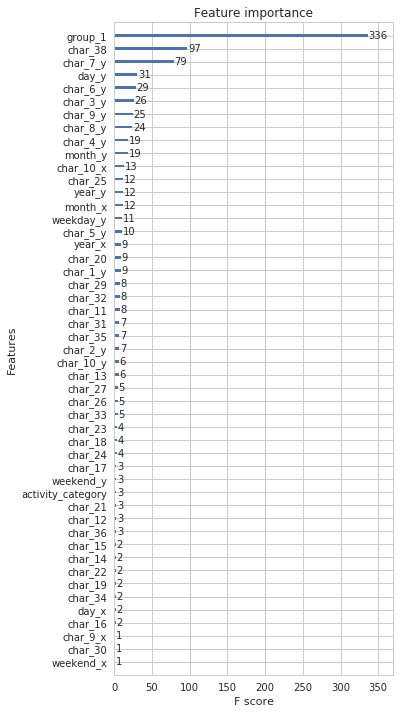

In [175]:
fig, ax = plt.subplots(1,1,figsize=(5,12))
xgboost.plot_importance(gbm2,ax=ax)

In [176]:
gbm2.save_model('ourmodel2.model')

In [177]:
from operator import itemgetter

In [178]:
sorted(gbm2.get_fscore().items(), key=itemgetter(1), reverse=True)[:10]

[('group_1', 336),
 ('char_38', 97),
 ('char_7_y', 79),
 ('day_y', 31),
 ('char_6_y', 29),
 ('char_3_y', 26),
 ('char_9_y', 25),
 ('char_8_y', 24),
 ('month_y', 19),
 ('char_4_y', 19)]

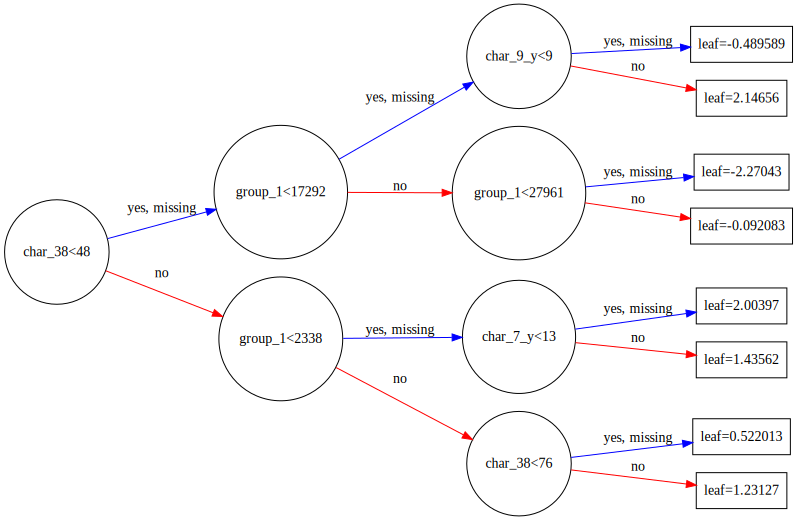

In [179]:
xgboost.to_graphviz(gbm2,rankdir='LR')

AUC : 0.859252

#### gblinear in xgboost

> Train a booster with given parameters.

In [202]:
categorical=['group_1','activity_category',
             'char_1_x','char_2_x','char_3_x',
             'char_4_x','char_5_x','char_6_x',
             'char_7_x','char_8_x','char_9_x','char_10_x',
             'char_2_y','char_3_y','char_4_y',
             'char_5_y','char_6_y','char_7_y',
             'char_8_y','char_9_y','char_10_y']
not_categorical=[]
for category in mergeX2.columns:
    if category not in categorical:
        not_categorical.append(category)

In [203]:
enc = OneHotEncoder(handle_unknown='ignore')
enc = enc.fit(pd.concat([mergeX2[categorical],testMerge2X[categorical]]))

In [204]:
mergeX_cat_sparse=enc.transform(mergeX2[categorical])
testMergeX_cat_sparse=enc.transform(testMerge2X[categorical])

In [205]:
from scipy.sparse import hstack
mergeX_sparse=hstack((mergeX2[not_categorical], mergeX_cat_sparse))
testMergeX_sparse=hstack((testMerge2X[not_categorical], testMergeX_cat_sparse))

In [208]:
x_train2, x_test2, y_train2,y_test2 = train_test_split(mergeX_sparse, mergey2, test_size=0.2)

In [211]:
dtrain3 = xgboost.DMatrix(x_train2,label=y_train2)
dvalid3 = xgboost.DMatrix(x_test2, label = y_test2)

In [212]:
param = {'eta':0.02, 'silent':1, 'objective':'binary:logistic' }
param['nthread'] = 4
param['eval_metric'] = 'auc'
param['subsample'] = 0.7
param['colsample_bytree']= 0.7
param['min_child_weight'] = 0
param['booster'] = "gblinear"

In [213]:
watchlist = [(dtrain3, 'train'), (dvalid3, 'eval')]
num_round = 300
early_stopping_rounds=10
bst = xgboost.train(param, dtrain3, num_round, watchlist,early_stopping_rounds=early_stopping_rounds)
douttest = xgboost.DMatrix(testMergeX_sparse)
ypred = bst.predict(douttest)

[0]	train-auc:0.889075	eval-auc:0.888395
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[1]	train-auc:0.896957	eval-auc:0.896266
[2]	train-auc:0.905293	eval-auc:0.904569
[3]	train-auc:0.913759	eval-auc:0.913011
[4]	train-auc:0.921857	eval-auc:0.921068
[5]	train-auc:0.929342	eval-auc:0.928509
[6]	train-auc:0.936297	eval-auc:0.935451
[7]	train-auc:0.942881	eval-auc:0.942018
[8]	train-auc:0.949123	eval-auc:0.948249
[9]	train-auc:0.954997	eval-auc:0.954115
[10]	train-auc:0.960424	eval-auc:0.959538
[11]	train-auc:0.965318	eval-auc:0.964433
[12]	train-auc:0.969646	eval-auc:0.968768
[13]	train-auc:0.9734	eval-auc:0.972528
[14]	train-auc:0.976608	eval-auc:0.975741
[15]	train-auc:0.979316	eval-auc:0.978453
[16]	train-auc:0.981586	eval-auc:0.980727
[17]	train-auc:0.983479	eval-auc:0.982625
[18]	train-auc:0.985051	eval-auc:0.984203
[19]	train-auc:0.986361	eval-auc:0.98552
[20]	train-auc:0.987456	eval-auc

[191]	train-auc:0.997585	eval-auc:0.996952
[192]	train-auc:0.997586	eval-auc:0.996953
[193]	train-auc:0.997587	eval-auc:0.996953
[194]	train-auc:0.997588	eval-auc:0.996954
[195]	train-auc:0.997589	eval-auc:0.996955
[196]	train-auc:0.99759	eval-auc:0.996956
[197]	train-auc:0.997591	eval-auc:0.996956
[198]	train-auc:0.997592	eval-auc:0.996957
[199]	train-auc:0.997594	eval-auc:0.996958
[200]	train-auc:0.997595	eval-auc:0.996958
[201]	train-auc:0.997596	eval-auc:0.996959
[202]	train-auc:0.997597	eval-auc:0.99696
[203]	train-auc:0.997598	eval-auc:0.99696
[204]	train-auc:0.997599	eval-auc:0.996961
[205]	train-auc:0.997599	eval-auc:0.996961
[206]	train-auc:0.9976	eval-auc:0.996962
[207]	train-auc:0.997601	eval-auc:0.996963
[208]	train-auc:0.997602	eval-auc:0.996963
[209]	train-auc:0.997603	eval-auc:0.996964
[210]	train-auc:0.997604	eval-auc:0.996964
[211]	train-auc:0.997605	eval-auc:0.996965
[212]	train-auc:0.997606	eval-auc:0.996965
[213]	train-auc:0.997607	eval-auc:0.996966
[214]	train-auc:

In [214]:
output = pd.DataFrame({ 'activity_id' : testMerge2['activity_id'], 'outcome': ypred })
output.head()
output.to_csv('sub_is.csv', index = False)

In [237]:
bst.best_iteration

296

> Reference
>> https://www.kaggle.com/abriosi/raddar-0-98-xgboost-sparse-matrix-python


AUC : 0.978236